# Distributions of deformation of the pack sea ice for BBM and aEVP rheologies

This notebook aims to compute the distributions of the hourly deformation of the pack ice for the two rheologies used in Fiol et al. 2026. These distributions will then be used to determine a threshold over which the hourly deformations are considered significant.

Some functions used here come from the homemade Python package: libfig.py. So, make sure to install Python_library library and that Python is able to locate it: put **export PYTHONPATH=<path_to_Python_library\>:${PYTHONPATH}** in your .bashrc, .profile or equivalent.

### Loading the libraries and data

In [1]:
#Loading the libraries needed
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import libfig

Name: libfig
Package: 
This is a collection of diverse functions for creating figures.


In [2]:
#Definition of some useful variables related to our experiments of interest

##Experiments of interest
exp_BBM="EABLBBM010"
exp_EVP="EABLEVP010"

##Other variables linked to the experiments
nb_member=20
fq_outputs="1h"

print(exp_BBM,exp_EVP,fq_outputs,nb_member)

##Some useful variables to load the data
diri="/lustre/fsstor/projects/rech/cli/commun/NANUK4/" #path to the directory containing all the experiments
simu_prefix="NANUK4_ICE_ABL"
simu_suffix="-S"

EABLBBM010 EABLEVP010 1h 20


In [3]:
#Loading the files containing the sea ice variables of the different members

dat_BBM=[] #list that will contain the members of the BBM experiment of interest
dat_EVP=[] #list that will contain the members of the EVP experiment of interest

for k in range(1,nb_member+1):#iteration over the members
    
    ##BBM
    path_BBM=diri+simu_prefix+"-"+exp_BBM+simu_suffix+"/*/"+str(k).zfill(3)+"*"+fq_outputs+"*icemod.nc4"
    print(path_BBM)
    dat_BBM.append(xr.open_mfdataset(path_BBM,decode_times=True))

    ##EVP
    path_EVP=diri+simu_prefix+"-"+exp_EVP+simu_suffix+"/*/"+str(k).zfill(3)+"*"+fq_outputs+"*icemod.nc4"
    print(path_EVP)
    dat_EVP.append(xr.open_mfdataset(path_EVP,decode_times=True))

print(len(dat_BBM),len(dat_EVP))

/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-EABLBBM010-S/*/001*1h*icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-EABLEVP010-S/*/001*1h*icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-EABLBBM010-S/*/002*1h*icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-EABLEVP010-S/*/002*1h*icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-EABLBBM010-S/*/003*1h*icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-EABLEVP010-S/*/003*1h*icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-EABLBBM010-S/*/004*1h*icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-EABLEVP010-S/*/004*1h*icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-EABLBBM010-S/*/005*1h*icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-EABLEVP010-S/*/005*1h*icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/NAN

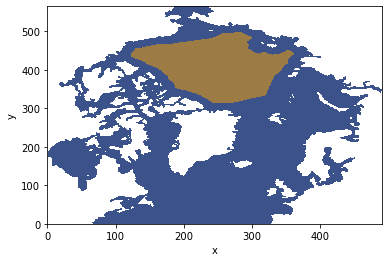

In [4]:
#Loading the mask files

dat_masks=xr.open_dataset(diri+"NANUK4.L31-I/mesh_mask_NANUK4_L31_4.2.nc") #masks of the configuration
dat_masks_domain=xr.open_dataset("/lustre/fswork/projects/rech/cli/udf71br/Laurines_work_Datlas/Masks/masks_domain_threshold_0.5.nc") #masks of the domain of interest

##Visualization of global and domain mask at T-point

plt.contourf(dat_masks.tmask[0,0,:,:].where(dat_masks.tmask[0,0,:,:]>0))
plt.contourf(dat_masks_domain.tmask.where(dat_masks_domain.tmask>0),alpha=0.5,colors="orange")
plt.xlabel("x") ; plt.ylabel("y")
plt.show()

### Selection of the data of interest

Selection of the deformation values from which we compute the distributions. We only consider pack ice values, i.e. within the domain of interest. Because of the computational cost, we compute the distributions considering only one member. The distributions should not change significantly from one member to another. To verify that, we compute the distributions for two different members.

In [5]:
#Some useful variables for the following

var_interest="sidefo-t"
coef=24.*3600.

In [6]:
#Members to consider to compute the distributions
member_1=19
member_2=16

In [7]:
#Put all the values to consider for a given computed distribution into a 1D array; the values to be disregarded (masked) are replaced by NaN values

##BBM
dat_defo_BBM_mb1=coef*dat_BBM[member_1][var_interest].where(dat_masks_domain.tmask>0).values.flatten()
dat_defo_BBM_mb2=coef*dat_BBM[member_2][var_interest].where(dat_masks_domain.tmask>0).values.flatten()

##EVP
dat_defo_EVP_mb1=coef*dat_EVP[member_1][var_interest].where(dat_masks_domain.tmask>0).values.flatten()
dat_defo_EVP_mb2=coef*dat_EVP[member_2][var_interest].where(dat_masks_domain.tmask>0).values.flatten()

### Computation of the quantiles

In [8]:
#Definition of the probabilities corresponding to the quantiles of interest

probability=[proba/100 for proba in range(0,90,5)]+[proba/100 for proba in range(90,100,1)]
print(len(probability),probability)

28 [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]


In [9]:
#Computation of the quantiles of the first selected member of BBM

quantiles_defo_BBM_mb1=np.nanquantile(dat_defo_BBM_mb1,q=probability)
print(len(quantiles_defo_BBM_mb1),quantiles_defo_BBM_mb1)

28 [1.95019220e-05 2.92070207e-04 4.36199390e-04 5.81476372e-04
 7.40665582e-04 9.24074819e-04 1.13873704e-03 1.39301685e-03
 1.69653073e-03 2.06279731e-03 2.50952202e-03 3.05966125e-03
 3.75045859e-03 4.63701074e-03 5.82063943e-03 7.48444442e-03
 1.00285960e-02 1.44722402e-02 2.41992455e-02 2.77024391e-02
 3.22617127e-02 3.84251252e-02 4.70695905e-02 5.98223187e-02
 7.97830144e-02 1.13219664e-01 1.74482337e-01 3.13575993e-01]


In [10]:
#Computation of the quantiles of the second selected member of BBM

quantiles_defo_BBM_mb2=np.nanquantile(dat_defo_BBM_mb2,q=probability)
print(len(quantiles_defo_BBM_mb2),quantiles_defo_BBM_mb2)

28 [1.99596852e-05 2.95361444e-04 4.37900657e-04 5.82472287e-04
 7.42412684e-04 9.25640343e-04 1.13908815e-03 1.39165200e-03
 1.69445234e-03 2.05913385e-03 2.50079192e-03 3.04501108e-03
 3.72850220e-03 4.61150659e-03 5.79537647e-03 7.45823735e-03
 9.99968424e-03 1.44229579e-02 2.41647700e-02 2.76929663e-02
 3.22853439e-02 3.84904462e-02 4.72144258e-02 6.01170123e-02
 8.02994770e-02 1.13903524e-01 1.75354982e-01 3.13461032e-01]


In [11]:
#Computation of the quantiles of the first selected member of EVP

quantiles_defo_EVP_mb1=np.nanquantile(dat_defo_EVP_mb1,q=probability)
print(len(quantiles_defo_EVP_mb1),quantiles_defo_EVP_mb1)

28 [6.25557368e-06 3.49236738e-04 5.81802387e-04 8.48117343e-04
 1.17504410e-03 1.58462039e-03 2.10041995e-03 2.75340816e-03
 3.57529302e-03 4.60134679e-03 5.88014442e-03 7.46299792e-03
 9.39038526e-03 1.17194597e-02 1.45692965e-02 1.81130585e-02
 2.26168212e-02 2.85993703e-02 3.73808555e-02 3.97542804e-02
 4.24825475e-02 4.56806868e-02 4.94939926e-02 5.41629309e-02
 6.01318377e-02 6.83696344e-02 8.11232573e-02 1.08208469e-01]


In [12]:
#Computation of the quantiles of the second selected member of EVP

quantiles_defo_EVP_mb2=np.nanquantile(dat_defo_EVP_mb2,q=probability)
print(len(quantiles_defo_EVP_mb2),quantiles_defo_EVP_mb2)

28 [5.59486989e-06 3.50338023e-04 5.83831506e-04 8.51426655e-04
 1.17989779e-03 1.59278489e-03 2.11287732e-03 2.77124896e-03
 3.60080996e-03 4.63367905e-03 5.91727206e-03 7.50307853e-03
 9.43857767e-03 1.17732374e-02 1.46363193e-02 1.81959779e-02
 2.27210913e-02 2.87168577e-02 3.75267379e-02 3.99112217e-02
 4.26364477e-02 4.58322069e-02 4.96534682e-02 5.43522762e-02
 6.03282885e-02 6.85721057e-02 8.13534667e-02 1.08517107e-01]


### Graphical representations

number of choosen subfigures = 4
number of choosen columns = 2
number of choosen rows = 2
choosen row with unequal number of columns: row -1


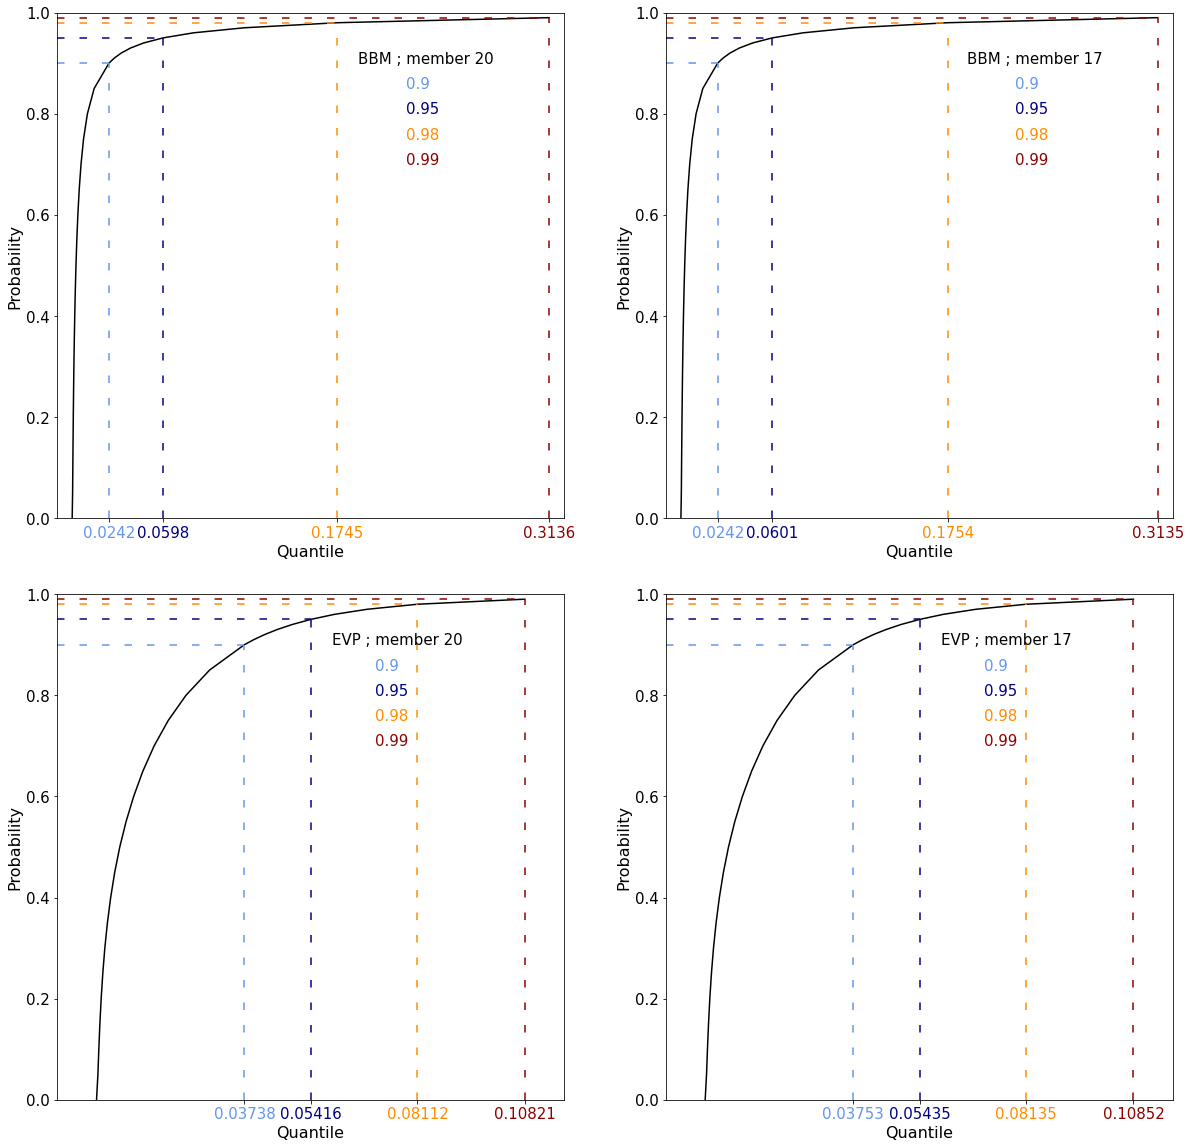

In [13]:
#Quantiles as a function of the associated probability for the two different members of interest and rheologies

##Definition of some useful variables
list_quantiles=[quantiles_defo_BBM_mb1,quantiles_defo_BBM_mb2,quantiles_defo_EVP_mb1,quantiles_defo_EVP_mb2]
legend=["BBM ; member "+str(member_1+1),"BBM ; member "+str(member_2+1),"EVP ; member "+str(member_1+1),"EVP ; member "+str(member_2+1)]
    ##Some probabilities to highlight
selected_proba=[0.9,0.95,0.98,0.99]
pos_select_proba=[np.where(np.array(probability)==proba)[0][0] for proba in selected_proba]
colors=["cornflowerblue","navy","darkorange","darkred"]

##Creation of the figure
fig=plt.figure(figsize=(20,20))
axes=libfig.faxes(4,2,2)
plt.subplots_adjust(wspace=0.5,hspace=0.15)

for iax in range(len(axes)):#iteration over the axes

    ##Plot the curve
    axes[iax].plot(list_quantiles[iax],probability,color="black")

    ##Set up the axes
    axes[iax].tick_params("both",labelsize=15)
    axes[iax].set_xticks(list_quantiles[iax][pos_select_proba])
    axes[iax].set_ylim(0,1)
    axes[iax].set_xlim(-0.01,list_quantiles[iax][-1]+0.01)
    axes[iax].set_ylabel("Probability",fontsize=16)
    axes[iax].set_xlabel("Quantile",fontsize=16)

    ##Set up some parts of the legend
    axes[iax].text(list_quantiles[iax][-1]*(0.6-0.05*(iax>1)),0.9,legend[iax],fontsize=15)
    
    ##Highlight the probabilities of interest
    for iproba in range(len(pos_select_proba)): #iteration over the probabilities of interest
        ipos=pos_select_proba[iproba]
        
        ##Some lines for a better visualisation
        axes[iax].plot(np.repeat(list_quantiles[iax][ipos],len(probability[:ipos+1])),probability[:ipos+1],color=colors[iproba],ls=(0, (5, 10)))
        axes[iax].plot([-0.01]+list(list_quantiles[iax][:ipos+1]),np.repeat(probability[ipos],len(list_quantiles[iax][:ipos+1])+1),color=colors[iproba],ls=(0, (5, 10)))

        ##Display the quantiles of interest in colour
        axes[iax].get_xticklabels()[-4+iproba].set_color(colors[iproba])

        ##Set up some parts of the legend
        axes[iax].text(list_quantiles[iax][-1]*(0.7-0.05*(iax>1)),0.85-iproba*0.05,selected_proba[iproba],color=colors[iproba],fontsize=15)   
        
plt.show()

number of choosen subfigures = 2
number of choosen columns = 2
number of choosen rows = 1
choosen row with unequal number of columns: row -1
quantiles considered:  0.9 0.95 0.98 0.99
width bar BBM 0.021733915328979492
width bar EVP 0.021895450353622437  (bins : 60)


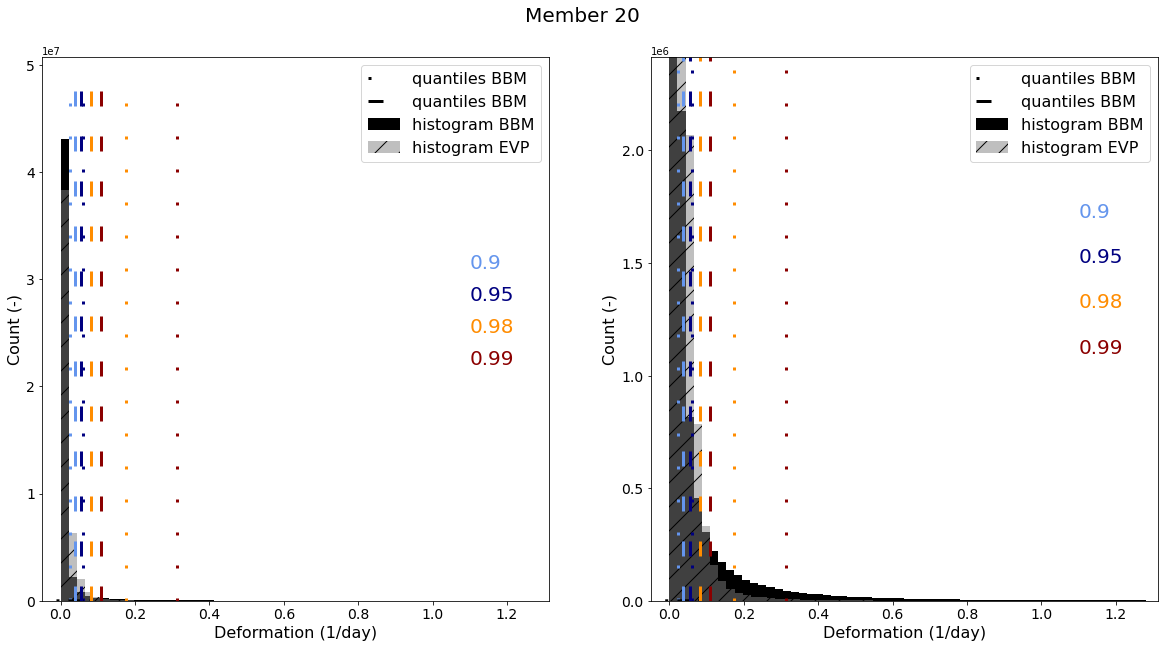

In [14]:
#Visualisation of the histograms of the distributions for the first member of interest

##Definition of some limits of the y-axis
lim_sup_zoom_yaxis=0.05*np.sum(np.where(np.isnan(dat_defo_BBM_mb1)==True,0,1)) #5% of total number values

##Creation of the figure
fig=plt.figure(figsize=(20,10))
axes=libfig.faxes(2,2,1)
plt.subplots_adjust(wspace=0.2)

##Print the quantiles considered
print("quantiles considered: ",probability[-10],probability[-5],probability[-2],probability[-1])
    ##Definition of colors associated with quantiles considered
colors=["cornflowerblue","navy","darkorange","darkred"]

##About the same width bars for BBM and EVP
print("width bar BBM",np.nanmax(dat_defo_BBM_mb1)/1000)
nb_bins_EVP=int(np.nanmax(dat_defo_EVP_mb1)*1000/np.nanmax(dat_defo_BBM_mb1))
print("width bar EVP",np.nanmax(dat_defo_EVP_mb1)/nb_bins_EVP," (bins : "+str(nb_bins_EVP)+")")

for iax in range(len(axes)):#iteration over the axes
    
    ##Plot the histograms
    axes[iax].hist(dat_defo_BBM_mb1,bins=1000,color="black",label="histogram BBM")#BBM
    axes[iax].hist(dat_defo_EVP_mb1,bins=nb_bins_EVP,color="grey",alpha=0.5,hatch="/",label="histogram EVP")#EVP
    
    ##Set up the axes
    axes[iax].tick_params("both",labelsize=14)
    axes[iax].set_ylabel("Count (-)",fontsize=16)
    axes[iax].set_xlabel("Deformation (1/day)",fontsize=16)
    axes[iax].set_xlim(-0.05,np.nanmax(dat_defo_EVP_mb1))
    if iax>0:
        axes[iax].set_ylim(0,lim_sup_zoom_yaxis)

    ##Highlight some quantiles
    axes[iax].plot([-0.1,0.1],[0,10],color="black",ls=(0, (1, 10)),label="quantiles BBM",lw=3)
    axes[iax].plot(np.repeat(quantiles_defo_BBM_mb1[-10],2),np.array([0,lim_sup_zoom_yaxis*(iax==1)+lim_sup_zoom_yaxis*(iax==0)/0.05]),color=colors[0],ls=(0, (1, 10)),lw=3)
    axes[iax].plot(np.repeat(quantiles_defo_BBM_mb1[-5],2),np.array([0,lim_sup_zoom_yaxis*(iax==1)+lim_sup_zoom_yaxis*(iax==0)/0.05]),color=colors[1],ls=(0, (1, 10)),lw=3)
    axes[iax].plot(np.repeat(quantiles_defo_BBM_mb1[-2],2),np.array([0,lim_sup_zoom_yaxis*(iax==1)+lim_sup_zoom_yaxis*(iax==0)/0.05]),color=colors[2],ls=(0, (1, 10)),lw=3)
    axes[iax].plot(np.repeat(quantiles_defo_BBM_mb1[-1],2),np.array([0,lim_sup_zoom_yaxis*(iax==1)+lim_sup_zoom_yaxis*(iax==0)/0.05]),color=colors[3],ls=(0, (1, 10)),lw=3)

    axes[iax].plot([-0.1,0.1],[0,10],color="black",ls=(0, (5, 10)),label="quantiles BBM",lw=3)
    axes[iax].plot(np.repeat(quantiles_defo_EVP_mb1[-10],2),np.array([0,lim_sup_zoom_yaxis*(iax==1)+lim_sup_zoom_yaxis*(iax==0)/0.05]),color=colors[0],ls=(0, (5, 10)),lw=3)
    axes[iax].plot(np.repeat(quantiles_defo_EVP_mb1[-5],2),np.array([0,lim_sup_zoom_yaxis*(iax==1)+lim_sup_zoom_yaxis*(iax==0)/0.05]),color=colors[1],ls=(0, (5, 10)),lw=3)
    axes[iax].plot(np.repeat(quantiles_defo_EVP_mb1[-2],2),np.array([0,lim_sup_zoom_yaxis*(iax==1)+lim_sup_zoom_yaxis*(iax==0)/0.05]),color=colors[2],ls=(0, (5, 10)),lw=3)
    axes[iax].plot(np.repeat(quantiles_defo_EVP_mb1[-1],2),np.array([0,lim_sup_zoom_yaxis*(iax==1)+lim_sup_zoom_yaxis*(iax==0)/0.05]),color=colors[3],ls=(0, (5, 10)),lw=3)

##Set up the legends
    axes[iax].legend(fontsize=16)
    
axes[0].text(1.1,3.1e7,probability[-10],color=colors[0],fontsize=20)
axes[0].text(1.1,2.8e7,probability[-5],color=colors[1],fontsize=20)
axes[0].text(1.1,2.5e7,probability[-2],color=colors[2],fontsize=20)
axes[0].text(1.1,2.2e7,probability[-1],color=colors[3],fontsize=20)

axes[1].text(1.1,1.7e6,probability[-10],color=colors[0],fontsize=20)
axes[1].text(1.1,1.5e6,probability[-5],color=colors[1],fontsize=20)
axes[1].text(1.1,1.3e6,probability[-2],color=colors[2],fontsize=20)
axes[1].text(1.1,1.1e6,probability[-1],color=colors[3],fontsize=20)

##Set up the title
plt.suptitle("Member "+str(member_1+1),y=0.95,fontsize=20)#telling which member is considered

plt.show()